In [22]:
import pandas as pd

In [23]:
df_dhaka = pd.read_csv('../1980-2024-dataset/Dhaka_historical_weather_1980_2024.csv')

# For Humidex (Humidity Index)
here we are taking temperature and humidity so that data doesn't leak while training models

In [24]:
df_dhaka.info()
df_dhaka.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          16151 non-null  float64
 5   feels_like(degree C)           16151 non-null  float64
 6   max_temperature(degree C)      16151 non-null  float64
 7   minimum_temperature(degree C)  16151 non-null  float64
 8   humidity                       16151 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      16437 non-null  float64
 11  atmospheric_pressure           15247 non-null  float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Dhaka,1,1,1980,19.0,19.0,25.1,12.1,74.9,NaN,9.3,1013.5,NaN,NaN,13.7
1,Dhaka,2,1,1980,16.8,16.8,21.1,14.1,86.2,NaN,9.4,1014.3,NaN,NaN,14.4
2,Dhaka,3,1,1980,18.4,18.4,23.1,15.1,84.7,NaN,22.3,1014.7,NaN,NaN,15.6
3,Dhaka,4,1,1980,17.8,17.8,23.1,14.1,78.1,NaN,3.7,1016.5,NaN,NaN,13.6
4,Dhaka,5,1,1980,18.2,18.2,24.1,14.1,71.9,NaN,5.6,1016.0,NaN,NaN,12.7


In [25]:
df_dhaka.describe()

,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
count,16437.000000,16437.000000,16437.000000,16151.000000,16151.000000,16151.000000,16151.000000,16151.000000,5479.000000,16437.000000,15247.000000,4038.000000,4038.000000,16151.000000
mean,15.730243,6.522723,2002.000000,26.305925,29.036834,30.110984,22.767519,73.864380,5.065249,13.690162,1007.749859,6.990342,189.779817,20.802297
std,8.800616,3.448865,12.988187,4.064580,6.443631,3.755147,4.994081,10.242961,10.251562,10.850077,5.626678,1.589586,53.910610,4.942076
min,1.000000,1.000000,1980.000000,10.300000,10.300000,11.400000,-0.900000,13.200000,0.000000,0.000000,973.000000,0.000000,0.000000,1.600000
25%,8.000000,4.000000,1991.000000,23.500000,23.500000,28.000000,18.900000,67.400000,0.000000,7.600000,1003.200000,6.000000,162.425000,16.600000
50%,16.000000,7.000000,2002.000000,27.600000,29.900000,30.700000,24.600000,74.500000,0.600000,13.000000,1008.000000,7.000000,192.800000,22.500000
75%,23.000000,10.000000,2013.000000,29.400000,34.500000,33.000000,26.900000,81.300000,6.100000,18.400000,1012.400000,8.000000,224.875000,25.100000
max,31.000000,12.000000,2024.000000,36.400000,46.100000,51.100000,36.400000,100.000000,197.700000,302.400000,1033.500000,10.000000,311.700000,29.100000


# Features for Humidity

In [26]:
desired_colmn = ['day', 'month', 'year', 'temperature(degree C)', 'dew_point']
HI_df_dhaka = df_dhaka[desired_colmn]

HI_df_dhaka.head()

,day,month,year,temperature(degree C),dew_point
0,1,1,1980,19.0,13.7
1,2,1,1980,16.8,14.4
2,3,1,1980,18.4,15.6
3,4,1,1980,17.8,13.6
4,5,1,1980,18.2,12.7


In [41]:
with_no_null_HI = HI_df_dhaka.dropna()
print(f"After removing missing values from dhaka, dataset contains {with_no_null_HI.shape[0]} rows and {with_no_null_HI.shape[1]} columns out of {df_dhaka.shape[0]} rows.")

After removing missing values from dhaka, dataset contains 16151 rows and 5 columns out of 16437 rows.


# count zeroes and drop it 

In [28]:

zeros_per_col = (with_no_null_HI == 0).sum()
zeros_df = zeros_per_col.to_frame(name='zero_count')
zeros_df['zero_percentage'] = (zeros_df['zero_count'] / len(with_no_null_HI) * 100).round(2)
zeros_df = zeros_df[zeros_df['zero_count'] > 0].sort_values('zero_count', ascending=False)

print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)


Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


# time series analysis

Date range: 1980-01-01 to 2024-12-31


C:\Users\Khalid\AppData\Local\Temp\ipykernel_10328\3783409384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])


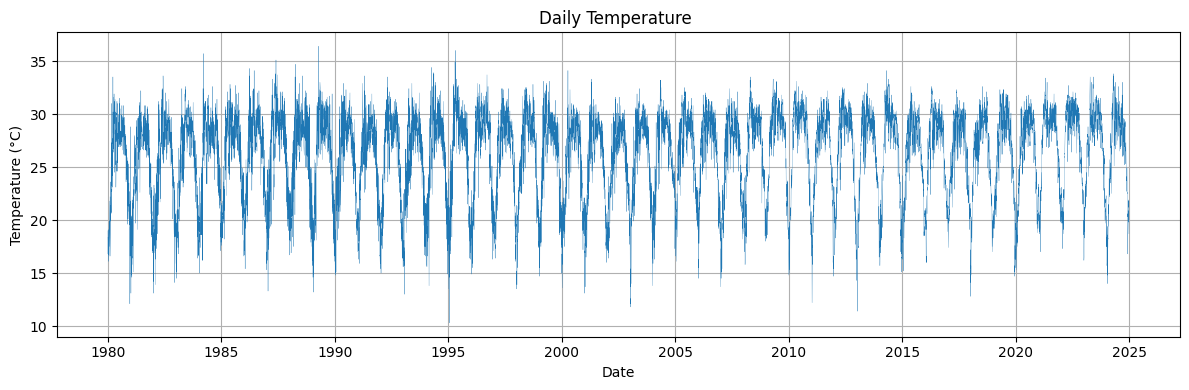

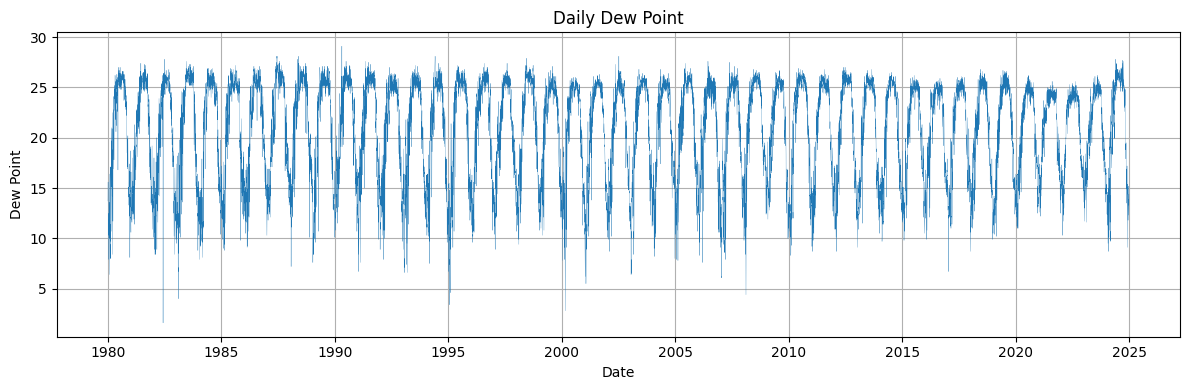

In [29]:
import matplotlib.pyplot as plt

# ensure a datetime column exists
if 'date' not in with_no_null_HI.columns:
    with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])

# show date range
min_date = with_no_null_HI['date'].min()
max_date = with_no_null_HI['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# plot daily temperature time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['temperature(degree C)'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature ')
plt.grid(True)
plt.tight_layout()
plt.show()

# plot dew point time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['dew_point'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Dew Point')
plt.title('Daily Dew Point')
plt.grid(True)
plt.tight_layout()
plt.show()



# Random Forest for tem and dewpoint using Fourier series

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe
# ------------------------------------------------------------------
# copy and ensure a proper datetime column exists
df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
desired_columns = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in desired_columns if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[desired_columns].copy()


df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)


df['day_of_year'] = df['date'].dt.dayofyear

def add_fourier_features(df, col, period, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)

# Collect Fourier columns robustly
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]


FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES]
y = df[TARGET].astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_r2_f  = r2_score(y_test, y_pred)
rf_mse_f = mean_squared_error(y_test, y_pred)
rf_rmse_f = np.sqrt(rf_mse_f)

def tolerance_accuracy(y_true, y_hat, tol):
    """Return percentage of values within tolerance (works for multi-output)."""
    # y_true/y_hat shape: (n_samples, n_targets)
    return 100.0 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05 = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10 = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20 = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30 = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest + Fourier – Dew-Point Prediction (Test) ===")
print(f"R²          : {rf_r2_f:.4f}")
print(f"RMSE        : {rf_rmse_f:.3f} °C")
print(f"MSE         : {rf_mse_f:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 °C : {rf_acc_05:5.2f}%")
print(f"  ±1.0 °C : {rf_acc_10:5.2f}%")
print(f"  ±2.0 °C : {rf_acc_20:5.2f}%")
print(f"  ±3.0 °C : {rf_acc_30:5.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n=== 5-Fold CV R² (with Fourier) ===")
print(f"Mean : {rf_cv_r2.mean():.4f}  (±{rf_cv_r2.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2, 4)}")

fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances (Top 10) ===")
print(fi.head(10).to_string(index=False))

=== Random Forest + Fourier – Dew-Point Prediction (Test) ===
R²          : 0.9026
RMSE        : 1.385 °C
MSE         : 1.9169
Accuracy (± tolerance):
  ±0.5 °C : 39.00%
  ±1.0 °C : 63.85%
  ±2.0 °C : 87.53%
  ±3.0 °C : 95.39%

=== 5-Fold CV R² (with Fourier) ===
Mean : 0.8987  (±0.0025)
Scores: [0.9022 0.8966 0.896  0.9011 0.8975]

=== Feature Importances (Top 10) ===
          feature  importance
day_of_year_cos_1    0.652857
day_of_year_sin_1    0.135048
             year    0.095027
            month    0.031979
              day    0.019701
day_of_year_sin_2    0.019228
day_of_year_cos_3    0.017747
day_of_year_sin_3    0.014907
day_of_year_cos_2    0.013505


# XGBoost for tem and dewpoint using Fourier Series 

In [31]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input validation & date ---
if 'with_no_null_HI' not in globals() and 'with_no_null_HI' not in locals():
    raise NameError("Expected DataFrame named `with_no_null_HI` in the environment")

df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# --- 2) Required columns & Fourier features ---
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
required = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[required].copy()
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)
df['day_of_year'] = df['date'].dt.dayofyear

def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365*3, n_terms=3)
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]

# --- 3) Features and targets ---
FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# --- 4) Train MultiOutput XGBoost ---
base_xgb = xgb.XGBRegressor( 
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)
model = MultiOutputRegressor(base_xgb)
model.fit(X_train, y_train)

# --- 5) Predictions & metrics ---
y_pred = model.predict(X_test)

xgboost_r2_f  = r2_score(y_test, y_pred)            # averaged R^2 for multioutput
xgboost_mse_f = mean_squared_error(y_test, y_pred)  # averaged MSE
xgboost_rmse_f = np.sqrt(xgboost_mse_f)

def within_tolerance_acc(y_true, y_hat, tol):
    # returns fraction (0..1) of predictions within tol across all targets
    return ((np.abs(y_true - y_hat) <= tol).mean())

xgboost_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgboost_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgboost_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgboost_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost Regression Metrics (Test) ====")
print(f"xgboost_R^2  : {xgboost_r2_f:.4f}")
print(f"xgboost_MSE  : {xgboost_mse_f:.4f}")
print(f"xgboost_RMSE : {xgboost_rmse_f:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {xgboost_acc_05*100:.2f}%")
print(f"  ±1.0°C : {xgboost_acc_10*100:.2f}%")
print(f"  ±2.0°C : {xgboost_acc_20*100:.2f}%")
print(f"  ±3.0°C : {xgboost_acc_30*100:.2f}%")

# --- 6) 5-fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean xgboost_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature importances (average across outputs) ---
# MultiOutputRegressor stores estimators_ after fit
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)
print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))

==== XGBoost Regression Metrics (Test) ====
xgboost_R^2  : 0.8926
xgboost_MSE  : 2.1136
xgboost_RMSE : 1.4538
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 34.85%
  ±1.0°C : 59.90%
  ±2.0°C : 86.00%
  ±3.0°C : 94.91%

==== 5-Fold CV R^2 ====
Mean xgboost_R^2 : 0.8872  |  Std : 0.0032

==== Top Feature Importances ====
          feature  importance
day_of_year_cos_3    0.856525
day_of_year_sin_1    0.053902
day_of_year_cos_1    0.029486
day_of_year_cos_2    0.023818
day_of_year_sin_2    0.009374
day_of_year_sin_3    0.007691
             year    0.007199
            month    0.007155
              day    0.004849


# LightGBM + fourier 

In [32]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input validation & date ---
if 'with_no_null_HI' not in globals() and 'with_no_null_HI' not in locals():
    raise NameError("Expected DataFrame named `with_no_null_HI` in the environment")

df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# --- 2) Required columns & Fourier features ---
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
required = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[required].copy()
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)
df['day_of_year'] = df['date'].dt.dayofyear

# Fourier feature function
def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365*3, n_terms=3)
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]

# --- 3) Features and targets ---
FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

# --- 4) Train MultiOutput LightGBM ---
base_lgb = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model = MultiOutputRegressor(base_lgb)
model.fit(X_train, y_train)

# --- 5) Predictions & metrics ---
y_pred = model.predict(X_test)

lgb_r2_f  = r2_score(y_test, y_pred)
lgb_mse_f = mean_squared_error(y_test, y_pred)
lgb_rmse_f = np.sqrt(lgb_mse_f)

def within_tolerance_acc(y_true, y_hat, tol):
    return ((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM Regression Metrics (Test) ====")
print(f"LGB_R^2  : {lgb_r2_f:.4f}")
print(f"LGB_MSE  : {lgb_mse_f:.4f}")
print(f"LGB_RMSE : {lgb_rmse_f:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {lgb_acc_05*100:.2f}%")
print(f"  ±1.0°C : {lgb_acc_10*100:.2f}%")
print(f"  ±2.0°C : {lgb_acc_20*100:.2f}%")
print(f"  ±3.0°C : {lgb_acc_30*100:.2f}%")

# --- 6) 5-fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)

print("\n==== 5-Fold CV R^2 ====")
print(f"Mean LGB_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature importances (average across outputs) ---
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)

print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 12920, number of used features: 9
[LightGBM] [Info] Start training from score 26.294714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1568
[LightGBM] [Info] Number of data points in the train set: 12920, number of used features: 9
[LightGBM] [Info] Start training from score 20.770302
==== LightGBM Regression Metrics (Test) ====
LGB_R^2  : 0.8796
LGB_MSE  : 2.3728
LGB_RMSE : 1.5404
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 33.12%
  ±1.0°C : 57.35%
  ±2.0°C : 83.52%
  ±3.0°C : 93.87%

==== 5-Fold CV R^2 ====
Mean LGB_R^2 : 0.8753  |  Std : 0.0027

==== Top Feature Importances ====
          feat

# show the comparision of all the models in a table. fourier

In [33]:
# show the comparision of all the models in a table.based on R^2, MSE, RMSE, and accuracy within tolerances.
# Summary of model performance
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "R^2": [rf_r2_f, xgboost_r2_f, lgb_r2_f],  # Replace with actual R^2 values from each model
    "MSE": [rf_mse_f, xgboost_mse_f, lgb_mse_f],  # Replace with actual MSE values from each model
    "RMSE": [rf_rmse_f, xgboost_rmse_f, lgb_rmse_f],  # Replace with actual RMSE values from each model
    "Acc ±0.5°C (%)": [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100],  # Replace with actual accuracy values
    "Acc ±1.0°C (%)": [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100],
    "Acc ±2.0°C (%)": [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100],
    "Acc ±3.0°C (%)": [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100],
})
print("\n==== Model Performance Comparison ====")
print(model_performance.to_string(index=False))



==== Model Performance Comparison ====
        Model      R^2      MSE     RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
Random Forest 0.902563 1.916941 1.384536     3899.721448     6385.020118     8752.708140     9538.842464
      XGBoost 0.892615 2.113592 1.453820       34.849892       59.904054       85.995048       94.908697
     LightGBM 0.879604 2.372766 1.540378       33.116682       57.350665       83.519034       93.871866


# Selecting the best model

In [34]:
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority) 
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): A list where each tuple is 
            (metric_name, maximize_boolean). 
            True=Higher is better (e.g., R^2, Accuracy).
            False=Lower is better (e.g., MSE, RMSE).
    
    Returns:
        str: The name of the best performing model.
    """
    
    sort_cols = [metric[0] for metric in sort_by_metrics]
    # If maximize=True, we use ascending=False (for descending order).
    # If maximize=False, we use ascending=True (for ascending order).
    ascending_list = [not metric[1] for metric in sort_by_metrics]

    # Rank the models using multiple columns for tie-breaking
    ranked_df = df.sort_values(
        by=sort_cols, 
        ascending=ascending_list
    ).reset_index(drop=True)
    
    best_model_name = ranked_df.iloc[0]['Model']
    
    print("\n--- Model Ranking Based on Current Strategy ---")
    # Show only the Model column and the metrics used for ranking
    print(ranked_df[['Model'] + sort_cols].to_string(index=False))
    
    return best_model_name


MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]
R_SQUARED_VALUES = [rf_r2_f, xgboost_r2_f, lgb_r2_f]
MSE_VALUES = [rf_mse_f, xgboost_mse_f, lgb_mse_f]
RMSE_VALUES = [rf_rmse_f, xgboost_rmse_f, lgb_rmse_f]
ACC_0_5_VALUES = [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100]
ACC_1_0_VALUES = [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100]
ACC_2_0_VALUES = [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100]
ACC_3_0_VALUES = [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100]


# You can add more metric value lists here if needed!

# B. Construct the DataFrame using the variables above
#    The dictionary keys become your column names (e.g., 'RMSE', 'Acc ±0.5 (%)').
data = {
    "Model": MODEL_NAMES,
    "R^2": R_SQUARED_VALUES,
    "MSE": MSE_VALUES,
    "RMSE": RMSE_VALUES,
    "Acc ±0.5 (%)": ACC_0_5_VALUES,
    "Acc ±1.0 (%)": ACC_1_0_VALUES,
    "Acc ±2.0 (%)": ACC_2_0_VALUES,
    "Acc ±3.0 (%)": ACC_3_0_VALUES,
}

df_performance = pd.DataFrame(data)

# =======================================================================
# 3. STRATEGY DEFINITION: EDIT THESE LISTS TO DEFINE YOUR PRIORITIES
# =======================================================================

# Define Strategy 1: Prioritizing low error (RMSE) first, then high R^2
# Structure: [('Metric Name', Is_Maximize)]
strategy_1_metrics = [
    ("RMSE", False),   # False = Minimize (Lower is better)
    ("R^2", True)      # True = Maximize (Higher is better)
]

# Define Strategy 2: Prioritizing tight accuracy (Acc ±0.5 %), then low MSE
strategy_2_metrics = [
    ("Acc ±0.5 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

strategy_3_0_metrics = [
    ("Acc ±1.0 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

# =======================================================================
# 4. EXECUTION
# =======================================================================

print("="*60)
print("             MODEL PERFORMANCE TABLE")
print("="*60)
print(df_performance.to_string(index=False))

# --- Run Strategy 1 ---
print("\n" + "="*60)
print("STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)")
print("="*60)
best_model_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 1: {best_model_1}")


# --- Run Strategy 2 ---
print("\n" + "="*60)
print("STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 2: {best_model_2}")

# --- Run Strategy 3 ---
print("\n" + "="*60)
print("STRATEGY 3: Prioritizing Acc ±1.0 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_3 = select_best_model(df_performance, strategy_3_0_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 3: {best_model_3}")

             MODEL PERFORMANCE TABLE
        Model      R^2      MSE     RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
Random Forest 0.902563 1.916941 1.384536   3899.721448   6385.020118   8752.708140   9538.842464
      XGBoost 0.892615 2.113592 1.453820     34.849892     59.904054     85.995048     94.908697
     LightGBM 0.879604 2.372766 1.540378     33.116682     57.350665     83.519034     93.871866

STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)

--- Model Ranking Based on Current Strategy ---
        Model     RMSE      R^2
Random Forest 1.384536 0.902563
      XGBoost 1.453820 0.892615
     LightGBM 1.540378 0.879604

✅ BEST MODEL FOR STRATEGY 1: Random Forest

STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)

--- Model Ranking Based on Current Strategy ---
        Model  Acc ±0.5 (%)      MSE
Random Forest   3899.721448 1.916941
      XGBoost     34.849892 2.113592
     LightGBM     33.116682 2.372766

✅ BEST MODEL FOR STRATEGY 2: R

# predicting next 3 years using the best model:
- here random forest 

In [35]:
import pandas as pd
import numpy as np

df = with_no_null_HI.copy()
TARGET = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGET

# Ensure date exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# 1) Create next 365 calendar dates
# ============================================================
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365*3, freq="D")

future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day
future_df["day_of_year"] = future_df["date"].dt.dayofyear

# ============================================================
# 2) Add FOURIER FEATURES exactly like training
# ============================================================
def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f"{col}_sin_{n}"] = np.sin(2 * np.pi * n * df[col] / period)
        df[f"{col}_cos_{n}"] = np.cos(2 * np.pi * n * df[col] / period)
    return df

future_df = add_fourier_features(future_df, "day_of_year", 365.25, n_terms=3)

# ============================================================
# 3) Build monthly-day climatology (baseline)
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month","day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

# Merge with future calendar
future_with_clim = future_df.merge(clim, on=["month","day"], how="left")

# Fallback to last 7-day mean if climatology missing
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 4) Build X_future EXACTLY as the RF was trained
# ============================================================
FEATURES = list(rf.feature_names_in_)   # <---- CRITICAL FIX

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing Fourier features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# ============================================================
# 5) Predict with trained RF model
# ============================================================
future_pred = rf.predict(X_future)

# ============================================================
# 6) Output DataFrame (same format as your template)
# ============================================================
rf_forecast_out2 = future_with_clim[["date", "year", "month", "day"]].copy()

# Split two-target RF predictions
rf_forecast_out2["pred_" + temp_col] = future_pred[:, 0]
rf_forecast_out2["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology (baseline) values
rf_forecast_out2[temp_col] = future_with_clim[temp_col]
rf_forecast_out2[dew_col]  = future_with_clim[dew_col]

print("==== 365-step Forecast Using Fourier + Random Forest ====")
print(rf_forecast_out2)


==== 365-step Forecast Using Fourier + Random Forest ====
           date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0    2025-01-01  2025      1    1                     17.8158         14.4678   
1    2025-01-02  2025      1    2                     17.6826         14.5014   
2    2025-01-03  2025      1    3                     17.7530         14.5420   
3    2025-01-04  2025      1    4                     18.1664         14.9762   
4    2025-01-05  2025      1    5                     17.9886         15.1458   
...         ...   ...    ...  ...                         ...             ...   
1090 2027-12-27  2027     12   27                     21.5512         12.7252   
1091 2027-12-28  2027     12   28                     21.3720         13.0046   
1092 2027-12-29  2027     12   29                     21.1714         13.8018   
1093 2027-12-30  2027     12   30                     20.8606         13.8918   
1094 2027-12-31  2027     12   31                  

<h1>Calculating Humidity Index using raw data(1980-2024)

In [36]:
import numpy as np
import pandas as pd

temp_col = 'temperature(degree C)'
dew_col = 'dew_point'

def calculate_humidex(T_c, D_c):
    """
    Humidex = T + 0.5555 × (6.11 × exp(5417.7530 × (1/273.16 - 1/(273.15 + D))) - 10)
    T_c : temperature in °C
    D_c : dew point in °C
    Returns humidex in °C (float) or np.nan if inputs invalid
    """
    try:
        if pd.isna(T_c) or pd.isna(D_c):
            return np.nan
        T = float(T_c)
        D = float(D_c)
    except (ValueError, TypeError):
        return np.nan

    # Avoid -inf/overflow but the formula is stable for realistic D values.
    exponent = 5417.7530 * (1.0/273.16 - 1.0/(273.15 + D))
    e_term = 6.11 * np.exp(exponent)
    humidex = T + 0.5555 * (e_term - 10.0)
    return humidex

# Apply to dataframe (vectorized via .apply is fine here)
with_no_null_HI['humidity_index'] = with_no_null_HI.apply(
    lambda r: calculate_humidex(r[temp_col], r[dew_col]), axis=1)

# Quick checks (keeps your existing calls)
with_no_null_HI['humidity_index'].info()
with_no_null_HI.tail(10)


<class 'pandas.core.series.Series'>
Index: 16151 entries, 0 to 16436
Series name: humidity_index
Non-Null Count  Dtype  
--------------  -----  
16151 non-null  float64
dtypes: float64(1)
memory usage: 252.4 KB


C:\Users\Khalid\AppData\Local\Temp\ipykernel_10328\2433947014.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_no_null_HI['humidity_index'] = with_no_null_HI.apply(


,day,month,year,temperature(degree C),dew_point,date,humidity_index
16427,22,12,2024,19.8,14.8,2024-12-22,23.645438
16428,23,12,2024,20.4,13.5,2024-12-23,23.476583
16429,24,12,2024,20.5,13.0,2024-12-24,23.296180
16430,25,12,2024,21.2,12.3,2024-12-25,23.617303
16431,26,12,2024,21.9,12.7,2024-12-26,24.531875
16432,27,12,2024,21.4,12.5,2024-12-27,23.923952
16433,28,12,2024,21.2,13.9,2024-12-28,24.506934
16434,29,12,2024,21.2,13.7,2024-12-29,24.391080
16435,30,12,2024,21.8,13.3,2024-12-30,24.763427
16436,31,12,2024,18.7,14.4,2024-12-31,22.302594


- <30 = Comfortable;
- 30-40 = Some discomfort;
- 40-45 = Great discomfort (avoid exertion);
- >45 = Dangerous (heatstroke possible). 


<h1> Calculating humidty index using predicted temperature and dew point Fourier

In [37]:
import numpy as np
import pandas as pd

temp_col = 'pred_temperature(degree C)'
dew_col = 'pred_dew_point'

def calculate_humidex(T_c, D_c): 
    """
    Humidex = T + 0.5555 × (6.11 × exp(5417.7530 × (1/273.16 - 1/(273.15 + D))) - 10)
    T_c : temperature in °C
    D_c : dew point in °C
    Returns humidex in °C (float) or np.nan if inputs invalid
    """
    try:
        if pd.isna(T_c) or pd.isna(D_c):
            return np.nan
        T = float(T_c)
        D = float(D_c)
    except (ValueError, TypeError):
        return np.nan

    exponent = 5417.7530 * (1.0/273.16 - 1.0/(273.15 + D))
    e_term = 6.11 * np.exp(exponent)
    humidex = T + 0.5555 * (e_term - 10.0)
    return humidex

# Calculate Humidex first
humidex_values = rf_forecast_out2.apply(lambda r: calculate_humidex(r[temp_col], r[dew_col]), axis=1)

# Assign the result as a new column
rf_forecast_out2 = rf_forecast_out2.copy()  # optional, avoids SettingWithCopyWarning
rf_forecast_out2['pred_humidity_index'] = humidex_values

# Quick checks
rf_forecast_out2['pred_humidity_index'].info()
rf_forecast_out2.tail(10)


<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: pred_humidity_index
Non-Null Count  Dtype  
--------------  -----  
1095 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


,date,year,month,day,pred_temperature(degree C),pred_dew_point,temperature(degree C),dew_point,pred_humidity_index
1085,2027-12-22,2027,12,22,20.1050,14.1414,19.617778,14.404444,23.553596
1086,2027-12-23,2027,12,23,20.0984,14.1854,19.881818,14.702273,23.573034
1087,2027-12-24,2027,12,24,20.4382,13.4452,19.928889,14.506667,23.483645
1088,2027-12-25,2027,12,25,20.6974,12.9582,20.033333,14.213333,23.470511
1089,2027-12-26,2027,12,26,21.2594,12.6584,19.613333,13.966667,23.868722
1090,2027-12-27,2027,12,27,21.5512,12.7252,19.397778,14.066667,24.196765
1091,2027-12-28,2027,12,28,21.3720,13.0046,19.451111,14.024444,24.170722
1092,2027-12-29,2027,12,29,21.1714,13.8018,18.860000,13.811111,24.421280
1093,2027-12-30,2027,12,30,20.8606,13.8918,19.326667,13.411111,24.162758
1094,2027-12-31,2027,12,31,20.6846,13.8700,18.980000,13.404444,23.974069


# 2025 testing data for validation (original data)

In [38]:
df_dhaka_2025_validation = pd.read_csv('../2025-dataset/Dhaka_historical_weather_2025.csv')
desired_column_2025 = ['day', 'month', 'year', 'temperature(degree C)', 'dew_point']
HI_df_dhaka_2025 = df_dhaka_2025_validation[desired_column_2025]




print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)
no_null_HI_2025 = HI_df_dhaka_2025.dropna()
print(f"After removing missing values from dhaka, dataset contains {no_null_HI_2025.shape[0]} rows and {no_null_HI_2025.shape[1]} columns out of {df_dhaka_2025_validation.shape[0]} rows.")
no_null_HI_2025.head()



Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


After removing missing values from dhaka, dataset contains 324 rows and 5 columns out of 324 rows.


,day,month,year,temperature(degree C),dew_point
0,1,1,2025,16.6,14.7
1,2,1,2025,14.7,13.4
2,3,1,2025,15.4,13.8
3,4,1,2025,18.0,14.9
4,5,1,2025,20.6,15.5


<h1> Calculating humidity index for 2025 raw data

In [39]:
import numpy as np
import pandas as pd

temp_col = 'temperature(degree C)'
dew_col = 'dew_point'

def calculate_humidex(T_c, D_c):
    """
    Humidex = T + 0.5555 × (6.11 × exp(5417.7530 × (1/273.16 - 1/(273.15 + D))) - 10)
    T_c : temperature in °C
    D_c : dew point in °C
    Returns humidex in °C (float) or np.nan if inputs invalid
    """
    try:
        if pd.isna(T_c) or pd.isna(D_c):
            return np.nan
        T = float(T_c)
        D = float(D_c)
    except (ValueError, TypeError):
        return np.nan

    # Avoid -inf/overflow but the formula is stable for realistic D values.
    exponent = 5417.7530 * (1.0/273.16 - 1.0/(273.15 + D))
    e_term = 6.11 * np.exp(exponent)
    humidex = T + 0.5555 * (e_term - 10.0)
    return humidex

# Apply to dataframe (vectorized via .apply is fine here)
no_null_HI_2025['humidity_index'] = no_null_HI_2025.apply(
    lambda r: calculate_humidex(r[temp_col], r[dew_col]), axis=1)

# Quick checks (keeps your existing calls)
no_null_HI_2025['humidity_index'].info()
no_null_HI_2025.tail(10)


<class 'pandas.core.series.Series'>
RangeIndex: 324 entries, 0 to 323
Series name: humidity_index
Non-Null Count  Dtype  
--------------  -----  
324 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


,day,month,year,temperature(degree C),dew_point,humidity_index
314,11,11,2025,24.4,15.9,28.943205
315,12,11,2025,23.8,15.3,27.957076
316,13,11,2025,23.6,15.6,27.948459
317,14,11,2025,23.3,16.7,28.379359
318,15,11,2025,23.5,17.1,28.856851
319,16,11,2025,23.8,15.5,28.084294
320,17,11,2025,24.1,15.8,28.577913
321,18,11,2025,24.0,16.4,28.875393
322,19,11,2025,24.3,14.6,28.023306
323,20,11,2025,24.1,14.5,27.762774


<h1>Plotting raw vs 2025-2027 predicted value 

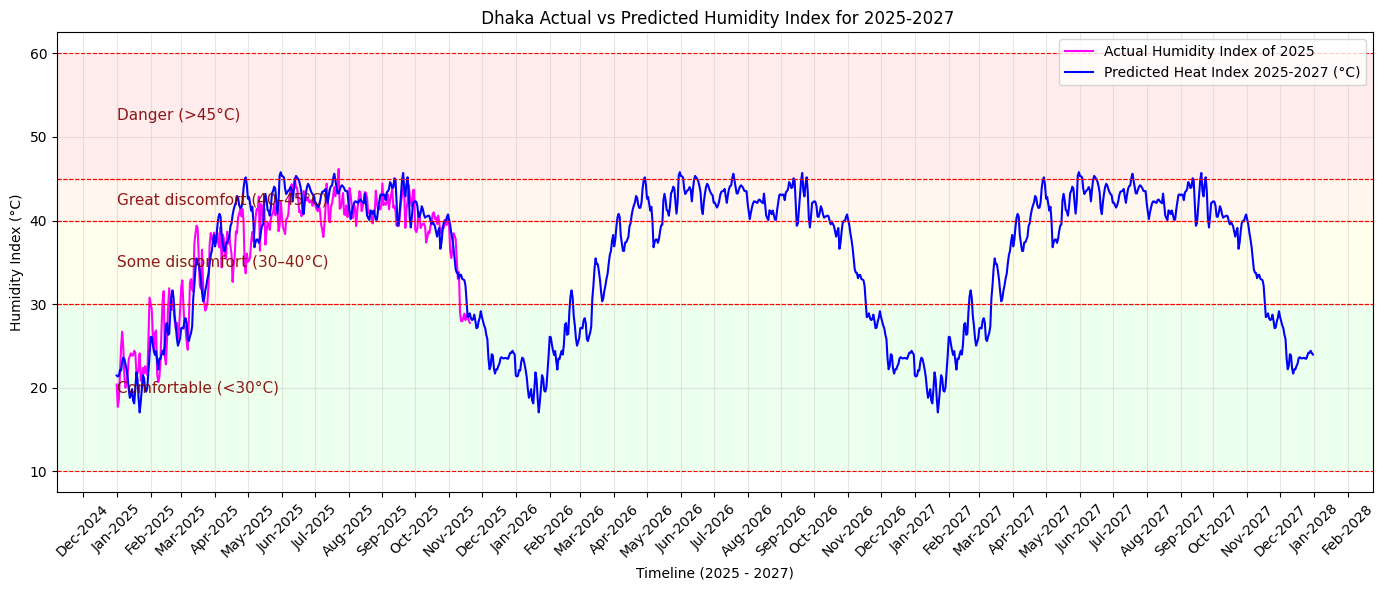

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))

def ensure_date(df):
    df = df.copy()
    df["date"] = pd.to_datetime(df[["year", "month", "day"]])
    return df

no_null_HI_2025 = ensure_date(no_null_HI_2025)
rf_forecast_out2 = ensure_date(rf_forecast_out2)

no_null_HI_2025 = no_null_HI_2025.set_index("date")
rf_forecast_out2 = rf_forecast_out2.set_index("date")

plt.plot(no_null_HI_2025.index, no_null_HI_2025['humidity_index'], 
         label='Actual Humidity Index of 2025', color='magenta')

plt.plot(rf_forecast_out2.index, rf_forecast_out2['pred_humidity_index'], 
         label='Predicted Heat Index 2025-2027 (°C)', color='blue')

plt.xlabel('Timeline (2025 - 2027)')
plt.ylabel('Humidity Index (°C)')
plt.title(' Dhaka Actual vs Predicted Humidity Index for 2025-2027')

bands = [
    (10, 30, "Comfortable (<30°C)", (0, 1, 0, 0.07)),
    (30, 40, "Some discomfort (30–40°C)", (1, 1, 0, 0.07)),
    (40, 45, "Great discomfort (40–45°C)", (1, 0.5, 0, 0.07)),
    (45, 60, "Danger (>45°C)", (1, 0, 0, 0.07))
]

ax = plt.gca()

for low, high, label, color in bands:
    ax.axhspan(low, high, facecolor=color, edgecolor=None)
    plt.axhline(y=low, color='red', linestyle='--', linewidth=0.8)
    plt.axhline(y=high, color='red', linestyle='--', linewidth=0.8)
    plt.text(
        x=no_null_HI_2025.index.min(),
        y=(low + high) / 2,
        s=label,
        fontsize=11,
        color="maroon",
        va="center",
        ha="left",
        alpha=0.9
    )

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# number of days count depending on the conditions

In [42]:
# 30 to 40 degrees celsius (some discomfort)
days_30_40 = rf_forecast_out2[
    (rf_forecast_out2['pred_humidity_index'] >= 30) & 
    (rf_forecast_out2['pred_humidity_index'] < 40)
].shape[0]
print(f"Number of days with predicted Humidity Index between 30°C and 40°C: {days_30_40} days")
# 40 to 45 degrees celsius (great discomfort )
days_40_45 = rf_forecast_out2[
    (rf_forecast_out2['pred_humidity_index'] >= 40) & 
    (rf_forecast_out2['pred_humidity_index'] < 45)
].shape[0]
print(f"Number of days with predicted Humidity Index between 40°C and 45°C: {days_40_45} days")
# above 45 degrees celsius ( danger )
days_above_45 = rf_forecast_out2[
    (rf_forecast_out2['pred_humidity_index'] >= 45)
].shape[0]
print(f"Number of days with predicted Humidity Index above 45°C: {days_above_45} days")

Number of days with predicted Humidity Index between 30°C and 40°C: 240 days
Number of days with predicted Humidity Index between 40°C and 45°C: 483 days
Number of days with predicted Humidity Index above 45°C: 39 days
